Explain what happens when you apply morphological dilation, erosion, opening, and closing operations using at least three kinds of structuring elements on your favorite binary image.

** You can use OpenCV's built -in functions.

** Using Latex for generating PDF is mandatory


In [1]:
#import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

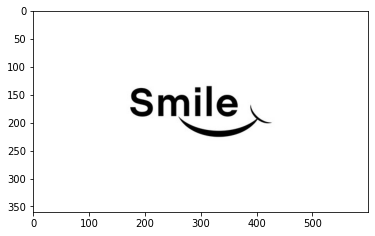

In [2]:
img = cv2.imread('smile.jpg')
img_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_show)

In [3]:
ret, binary_img = cv2.threshold(img, 127, 255, type=cv2.THRESH_BINARY_INV)

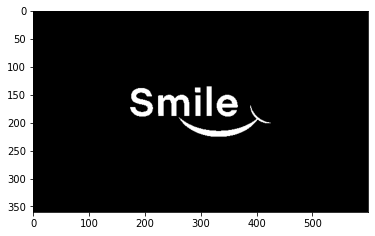

In [4]:
plt.imshow(binary_img, cmap='gray')
plt.show()

In [5]:
kernel = np.ones((3, 3))
kernel

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## Dilation

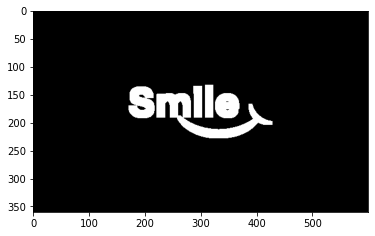

In [16]:
iterations = 3
dilation_img = cv2.dilate(binary_img, kernel=kernel, iterations=iterations)
plt.imshow(dilation_img)

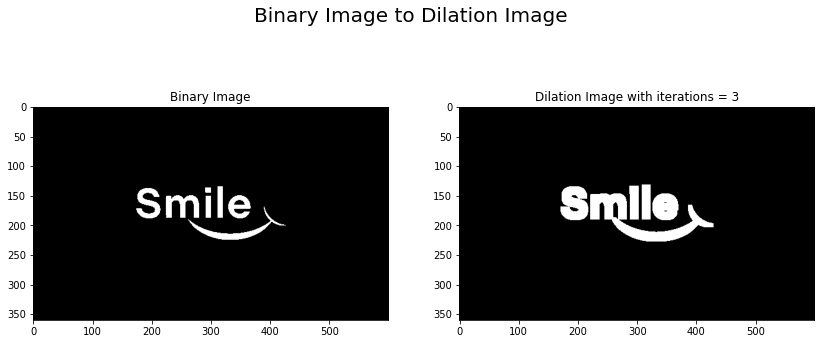

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].imshow(binary_img)
ax[0].set_title('Binary Image')

ax[1].imshow(dilation_img)
ax[1].set_title('Dilation Image with iterations = ' +str(iterations) )

plt.suptitle('Binary Image to Dilation Image', fontsize=20)
plt.show()